In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib的pyplot子库提供了和matlab类似的绘图API，方便用户快速绘制2D图表
%matplotlib inline

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store.csv", index_col=0)
vstable.shape

(40, 6)

In [3]:
vstable.head(10)

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,45000,25,27,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action
6,M,18000,20,33,1.7,Action
7,F,29000,45,19,3.8,Drama
8,M,74000,25,31,2.4,Action
9,M,38000,21,18,2.1,Comedy


In [4]:
vstable.columns

Index(['Gender', 'Income', 'Age', 'Rentals', 'AvgPerVisit', 'Genre'], dtype='object')

In [5]:
vstable.dtypes

Gender          object
Income           int64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [6]:
#根据需要将列转换为其他类型
vstable["Income"] = vstable["Income"].astype(float)
vstable.dtypes

Gender          object
Income         float64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [7]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 6 columns):
Gender         40 non-null object
Income         40 non-null float64
Age            40 non-null int64
Rentals        40 non-null int64
AvgPerVisit    40 non-null float64
Genre          40 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ KB


In [8]:
vstable.describe()

,Income,Age,Rentals,AvgPerVisit
count,40.000000,40.000000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500
std,22925.744123,12.752074,9.594035,0.833401
min,1000.000000,15.000000,11.000000,1.200000
25%,24750.000000,21.000000,19.000000,2.200000
50%,41000.000000,30.000000,25.000000,2.800000
75%,57500.000000,36.500000,32.250000,3.325000
max,89000.000000,70.000000,48.000000,4.600000


In [9]:
min_sal = vstable["Income"].min()
max_sal = vstable["Income"].max()
print(min_sal, max_sal)

1000.0 89000.0


In [10]:
vstable.describe(include="all")

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
count,40,40.000000,40.000000,40.000000,40.000000,40
unique,2,NaN,NaN,NaN,NaN,3
top,M,NaN,NaN,NaN,NaN,Action
freq,21,NaN,NaN,NaN,NaN,15
mean,NaN,41500.000000,31.500000,26.175000,2.792500,NaN
std,NaN,22925.744123,12.752074,9.594035,0.833401,NaN
min,NaN,1000.000000,15.000000,11.000000,1.200000,NaN
25%,NaN,24750.000000,21.000000,19.000000,2.200000,NaN
50%,NaN,41000.000000,30.000000,25.000000,2.800000,NaN
75%,NaN,57500.000000,36.500000,32.250000,3.325000,NaN


In [11]:
vstable[["Income", "Age"]].describe()

,Income,Age
count,40.000000,40.000000
mean,41500.000000,31.500000
std,22925.744123,12.752074
min,1000.000000,15.000000
25%,24750.000000,21.000000
50%,41000.000000,30.000000
75%,57500.000000,36.500000
max,89000.000000,70.000000


In [12]:
#通过直接将操作应用到panda系列来执行数据转换，比如normalization
norm_sal = (vstable["Income"] - min_sal) / (max_sal-min_sal)
norm_sal.head(10)

ID
1     0.500000
2     0.602273
3     0.352273
4     0.659091
5     0.409091
6     0.193182
7     0.318182
8     0.829545
9     0.420455
10    0.727273
Name: Income, dtype: float64

In [13]:
#Z-Score Standardization on Age
age_z = (vstable["Age"] - vstable["Age"].mean()) / vstable["Age"].std()
age_z.head(5)

ID
1   -0.509721
2    0.117628
3   -0.901814
4    3.019117
5    0.274465
Name: Age, dtype: float64

In [14]:
#加入新的col
vstable["Age-Std"] = age_z
vstable.head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std
ID,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721
2,F,54000.0,33,12,3.4,Drama,0.117628
3,F,32000.0,20,42,1.6,Comedy,-0.901814
4,F,59000.0,70,16,4.2,Drama,3.019117
5,M,37000.0,35,25,3.2,Action,0.274465


In [15]:
# Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
inc_bins = pd.qcut(vstable.Income, 3)
inc_bins.head(10)

ID
1     (29000.0, 49000.0]
2     (49000.0, 89000.0]
3     (29000.0, 49000.0]
4     (49000.0, 89000.0]
5     (29000.0, 49000.0]
6     (999.999, 29000.0]
7     (999.999, 29000.0]
8     (49000.0, 89000.0]
9     (29000.0, 49000.0]
10    (49000.0, 89000.0]
Name: Income, dtype: category
Categories (3, interval[float64]): [(999.999, 29000.0] < (29000.0, 49000.0] < (49000.0, 89000.0]]

In [16]:
#specifiy an array of quantiles for discretization together with labels for the bins)
inc_bins = pd.qcut(vstable.Income, [0, .33, .66, 1], labels=["low", "mid", "high"])
inc_bins.head(10)

ID
1      mid
2     high
3      mid
4     high
5      mid
6      low
7      low
8     high
9      mid
10    high
Name: Income, dtype: category
Categories (3, object): [low < mid < high]

In [17]:
vstable["inc-bins"] = inc_bins#通过特定列名选取子表
vstable.head(10)

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std,inc-bins
ID,,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721,mid
2,F,54000.0,33,12,3.4,Drama,0.117628,high
3,F,32000.0,20,42,1.6,Comedy,-0.901814,mid
4,F,59000.0,70,16,4.2,Drama,3.019117,high
5,M,37000.0,35,25,3.2,Action,0.274465,mid
6,M,18000.0,20,33,1.7,Action,-0.901814,low
7,F,29000.0,45,19,3.8,Drama,1.058651,low
8,M,74000.0,25,31,2.4,Action,-0.509721,high
9,M,38000.0,21,18,2.1,Comedy,-0.823395,mid


In [18]:
#drop columns from the dataframe
vstable.drop(columns=['Age-Std','inc-bins'], inplace=True)#inplace = True：不创建新的对象，直接对原始对象进行修改；inplace = False：对数据进行修改，创建并返回新的对象承载其修改结果。
vstable.head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,45000.0,25,27,2.5,Action
2,F,54000.0,33,12,3.4,Drama
3,F,32000.0,20,42,1.6,Comedy
4,F,59000.0,70,16,4.2,Drama
5,M,37000.0,35,25,3.2,Action


In [19]:
vs_numeric = vstable[["Age","Income","Rentals","AvgPerVisit"]]#选取其中四列数据格式全为num
vs_num_std = (vs_numeric - vs_numeric.mean()) / vs_numeric.std()#通过标准化列表格式计算
vs_num_std.head(10)

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960
6,-0.901814,-1.025049,0.711379,-1.310893
7,1.058651,-0.545239,-0.747860,1.208901
8,-0.509721,1.417620,0.502917,-0.470962
9,-0.823395,-0.152667,-0.852092,-0.830932


In [20]:
zscore = lambda x: (x - x.mean()) / x.std()
# lambda函数也叫匿名函数，即没有具体名称的函数，它允许快速定义单行函数，可以用在任何需要函数的地方。这区别于def定义的函数。
vs_num_std = vs_numeric.apply(zscore)
#Python中apply函数的格式为：apply(func,*args,**kwargs)，func可以是匿名函数。用途：当一个函数的参数存在于一个元组或者一个字典中时，用来间接的调用这个函数，并将元组或者字典中的参数按照顺序传递给参数
vs_num_std.head()

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960


In [21]:
# 设置标准化函数
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
vs_std = vstable.copy()
vs_std.apply(zscore).head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,0.152667,-0.509721,0.085991,-0.350971,Action
2,F,0.545239,0.117628,-1.477480,0.728941,Drama
3,F,-0.414381,-0.901814,1.649462,-1.430883,Comedy
4,F,0.763334,3.019117,-1.060555,1.688862,Drama
5,M,-0.196286,0.274465,-0.122472,0.488960,Action


In [26]:
#Grouping and aggregating data
vstable.groupby("Gender").mean()

,Income,Age,Rentals,AvgPerVisit
Gender,,,,
F,40631.578947,33.631579,27.684211,2.968421
M,42285.714286,29.571429,24.809524,2.633333


In [23]:
vstable.groupby("Genre").mean()

,Income,Age,Rentals,AvgPerVisit
Genre,,,,
Action,32666.666667,24.066667,29.933333,2.466667
Comedy,45000.000000,31.916667,25.666667,2.641667
Drama,48461.538462,39.692308,22.307692,3.307692


In [35]:
vstable.groupby("Genre").describe().T

Genre                    Action        Comedy         Drama
Income      count     15.000000     12.000000     13.000000
            mean   32666.666667  45000.000000  48461.538462
            std    21562.754484  29073.574381  15119.608596
            min     6000.000000   1000.000000  25000.000000
            25%    17000.000000  27750.000000  41000.000000
            50%    26000.000000  43500.000000  47000.000000
            75%    43000.000000  68000.000000  59000.000000
            max    74000.000000  89000.000000  79000.000000
Age         count     15.000000     12.000000     13.000000
            mean      24.066667     31.916667     39.692308
            std        6.374802     14.650215     11.933040
            min       16.000000     15.000000     22.000000
            25%       19.000000     20.750000     33.000000
            50%       25.000000     27.500000     36.000000
            75%       27.000000     46.000000     45.000000
            max       35.000000     56.000000     70.000000
Rentals     count     15.000000     12.000000     13.000000
            mean      29.933333     25.666667     22.307692
            std        7.591976     10.662878      9.672854
            min       17.000000     12.000000     11.000000
            25%       25.500000     17.250000     16.000000
            50%       29.000000     23.500000     21.000000
            75%       35.000000     34.500000     24.000000
            max       43.000000     42.000000     48.000000
AvgPerVisit count     15.000000     12.000000     13.000000
            mean       2.466667      2.641667      3.307692
            std        0.776132      0.967150      0.504086
            min        1.400000      1.200000      2.300000
            25%        1.950000      1.975000      3.100000
            50%        2.400000      2.600000      3.300000
            75%        2.800000      3.300000      3.600000
            max        4.600000      4.100000      4.200000

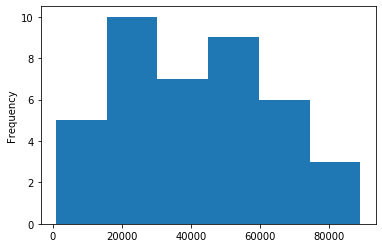

In [25]:
vstable["Income"].plot(kind="hist", bins=6)

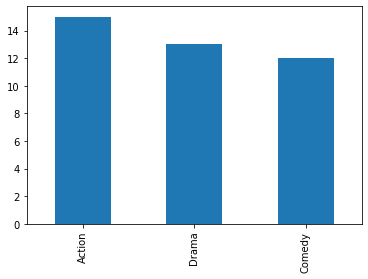

In [27]:
vstable["Genre"].value_counts().plot(kind='bar')

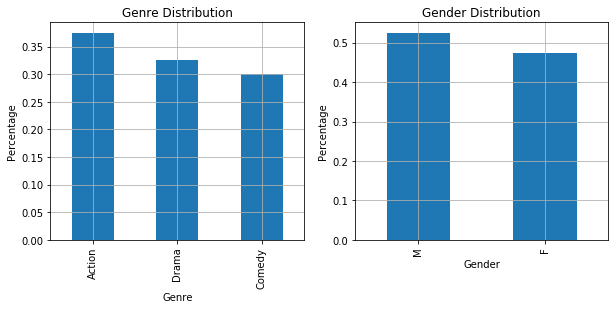

In [36]:
temp1 = vstable["Genre"].value_counts()/vstable["Genre"].count()
temp2 = vstable["Gender"].value_counts()/vstable["Gender"].count()
temp2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Percentage')
ax1.set_title("Genre Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage')
ax1.set_title("Gender Distribution")
temp2.plot(kind='bar', grid = True)

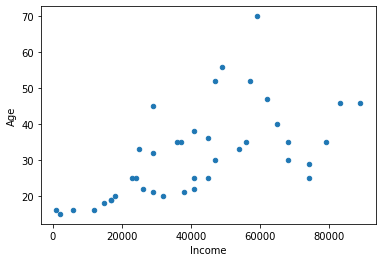

In [37]:
vstable.plot(x="Income", y="Age", kind="scatter")

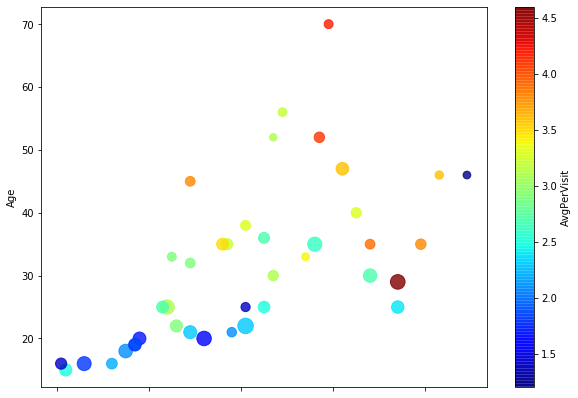

In [38]:
vstable.plot(x="Income", y="Age", kind="scatter", alpha=0.8, s=vstable["Rentals"]*5, c="AvgPerVisit", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))

In [39]:
vstable.groupby(["Genre","Gender"])["Gender"].count()

Genre   Gender
Action  F          5
        M         10
Comedy  F          6
        M          6
Drama   F          8
        M          5
Name: Gender, dtype: int64

In [40]:
gg = pd.crosstab(vstable["Genre"], vstable["Gender"])#pivotTab是透视表，crosstab是交叉表
gg

Gender,F,M
Genre,,
Action,5,10
Comedy,6,6
Drama,8,5


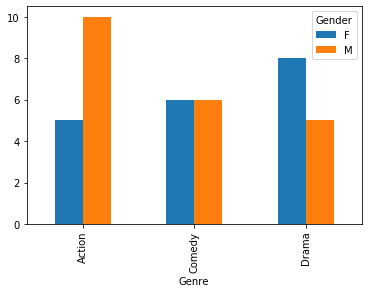

In [41]:
plt.show(gg.plot(kind="bar"))

In [42]:
gg["percent_female"] = gg["F"]/(gg["F"]+gg["M"])
gg

Gender,F,M,percent_female
Genre,,,
Action,5,10,0.333333
Comedy,6,6,0.500000
Drama,8,5,0.615385


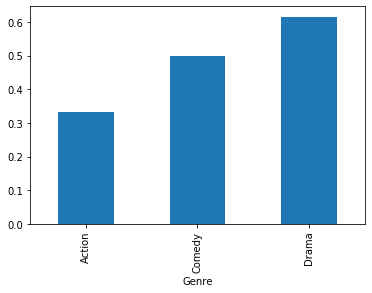

In [43]:
plt.show(gg["percent_female"].plot(kind="bar"))

In [44]:
good_cust = vstable[vstable.Rentals>=30]
good_cust

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
3,F,32000.0,20,42,1.6,Comedy
6,M,18000.0,20,33,1.7,Action
8,M,74000.0,25,31,2.4,Action
11,F,41000.0,22,48,2.3,Drama
15,M,68000.0,30,36,2.7,Comedy
18,F,6000.0,16,39,1.8,Action
19,F,24000.0,25,41,3.1,Comedy
23,F,2000.0,15,30,2.5,Comedy
26,F,56000.0,35,40,2.6,Action


In [45]:
print("Good Customers:")
good_cust.describe()

Good Customers:


,Income,Age,Rentals,AvgPerVisit
count,14.000000,14.000000,14.000000,14.000000
mean,37000.000000,24.428571,37.000000,2.507143
std,25404.421178,8.599770,5.349335,0.818502
min,2000.000000,15.000000,30.000000,1.600000
25%,17250.000000,19.250000,32.250000,1.875000
50%,30500.000000,21.500000,36.500000,2.350000
75%,60500.000000,28.000000,40.750000,2.675000
max,74000.000000,47.000000,48.000000,4.600000


In [46]:
gender_bin = pd.get_dummies(vstable["Gender"], prefix="Gender")
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
gender_bin.head()

,Gender_F,Gender_M
ID,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [47]:
vs_ssf = pd.get_dummies(vstable)#pandas.get_dummies可以理解成把一列中的分类以子列形式表达
vs_ssf.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
ID,,,,,,,,,
1,45000.0,25,27,2.5,0,1,1,0,0
2,54000.0,33,12,3.4,1,0,0,0,1
3,32000.0,20,42,1.6,1,0,0,1,0
4,59000.0,70,16,4.2,1,0,0,0,1
5,37000.0,35,25,3.2,0,1,1,0,0
6,18000.0,20,33,1.7,0,1,1,0,0
7,29000.0,45,19,3.8,1,0,0,0,1
8,74000.0,25,31,2.4,0,1,1,0,0
9,38000.0,21,18,2.1,0,1,0,1,0


In [48]:
# Min-Max normalization performed on the full numeric data set

vs_norm = (vs_ssf - vs_ssf.min()) / (vs_ssf.max()-vs_ssf.min())
vs_norm.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
ID,,,,,,,,,
1,0.500000,0.181818,0.432432,0.382353,0.0,1.0,1.0,0.0,0.0
2,0.602273,0.327273,0.027027,0.647059,1.0,0.0,0.0,0.0,1.0
3,0.352273,0.090909,0.837838,0.117647,1.0,0.0,0.0,1.0,0.0
4,0.659091,1.000000,0.135135,0.882353,1.0,0.0,0.0,0.0,1.0
5,0.409091,0.363636,0.378378,0.588235,0.0,1.0,1.0,0.0,0.0
6,0.193182,0.090909,0.594595,0.147059,0.0,1.0,1.0,0.0,0.0
7,0.318182,0.545455,0.216216,0.764706,1.0,0.0,0.0,0.0,1.0
8,0.829545,0.181818,0.540541,0.352941,0.0,1.0,1.0,0.0,0.0
9,0.420455,0.109091,0.189189,0.264706,0.0,1.0,0.0,1.0,0.0


In [49]:
# After converting to all numeric attributes, we can perform correlation analysis on the variable

corr_matrix = vs_ssf.corr()
corr_matrix

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Income,1.000000,0.613769,-0.262472,0.468565,-0.036490,0.036490,-0.302256,0.101217,0.213388
Age,0.613769,1.000000,-0.547113,0.629107,0.161022,-0.161022,-0.457274,0.021663,0.451453
Rentals,-0.262472,-0.547113,1.000000,-0.206353,0.151535,-0.151535,0.307303,-0.035128,-0.283266
AvgPerVisit,0.468565,0.629107,-0.206353,1.000000,0.203343,-0.203343,-0.306701,-0.119992,0.434413
Gender_F,-0.036490,0.161022,0.151535,0.203343,1.000000,-1.000000,-0.219744,0.032774,0.195067
Gender_M,0.036490,-0.161022,-0.151535,-0.203343,-1.000000,1.000000,0.219744,-0.032774,-0.195067
Genre_Action,-0.302256,-0.457274,0.307303,-0.306701,-0.219744,0.219744,1.000000,-0.507093,-0.537484
Genre_Comedy,0.101217,0.021663,-0.035128,-0.119992,0.032774,-0.032774,-0.507093,1.000000,-0.454257
Genre_Drama,0.213388,0.451453,-0.283266,0.434413,0.195067,-0.195067,-0.537484,-0.454257,1.000000


In [50]:
corr_matrix["Rentals"].sort_values(ascending=False)
#DataFrame.corr(method=‘pearson’, min_periods=1)
#计算列与列之间的相关系数，返回相关系数矩阵

#method : {‘pearson’, ‘kendall’, ‘spearman’}
#pearson : standard correlation coefficient
#kendall : Kendall Tau correlation coefficient
#spearman : Spearman rank correlation
#解释：相关系数的取值范围为[-1, 1],当接近1时，表示两者具有强烈的正相关性，比如‘s’和‘x’；当接近-1时，表示有强烈的的负相关性，比如‘s’和‘c’，而若值接近0，则表示相关性很低.


Rentals         1.000000
Genre_Action    0.307303
Gender_F        0.151535
Genre_Comedy   -0.035128
Gender_M       -0.151535
AvgPerVisit    -0.206353
Income         -0.262472
Genre_Drama    -0.283266
Age            -0.547113
Name: Rentals, dtype: float64

In [52]:
vs_norm.to_csv("Video_Store_Numeric.csv", float_format="%1.2f")